<a href="https://www.kaggle.com/code/chythanyasivadas/netflix-user-database?scriptVersionId=145001664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

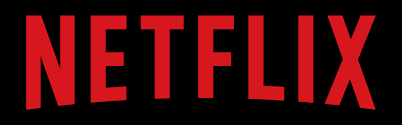

# *Importing Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# *Data Exploration*

In [ ]:
data=pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.size

In [ ]:
data.isnull().sum()

*From the above infomation ,we have no null values in the dataset.Thus the dataset is Clean.*

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.nunique()

*To know more about each columns and count ,we can use Value_counts*

In [ ]:
data['Subscription Type'].value_counts()

In [ ]:
data['Device'].value_counts()

In [ ]:
data['Monthly Revenue'].value_counts()

In [ ]:
data['Country'].value_counts()

In [ ]:
data['Age'].value_counts()

In [ ]:
data['Gender'].value_counts()

In [ ]:
data.groupby('Subscription Type')[['Monthly Revenue','Age']].aggregate(['mean','std','min','max'])

In [ ]:
data.groupby('Device')[['Monthly Revenue','Age']].aggregate(['mean','std','min','max'])

# *Data Visualization*

In [ ]:
colors = ['#DC143C','#000000']
data['Gender'].value_counts().plot(kind='pie',colors = colors,autopct='%1.1f%%',textprops={'color':"#8B8878"})
plt.title('Gender')


In [ ]:
colors = ['#DC143C','#000000','#FFEBCD']
data['Subscription Type'].value_counts().plot(kind='pie',colors = colors,autopct='%1.1f%%',textprops={'color':"#8B8878"})

plt.title('Subsription Type')

In [ ]:
colors = ['#DC143C','#000000','#FFEBCD','#8B7D6B']
data['Device'].value_counts().plot(kind='pie',colors = colors,autopct='%1.1f%%',textprops={'color':"#E3CF57"})

plt.title('Device distribution')

In [ ]:
subscription_counts = data.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()
colors = ['#DC143C','#000000','#FFEBCD']
ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6),color = ['#DC143C','#000000','#FFEBCD'])
plt.title('Subscription Plan Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()


In [ ]:
user_age = data['Age'].value_counts()

plt.figure(figsize=(8, 6))
user_age.plot(kind='bar', color='#DC143C')
plt.title('Distribution of Netflix Subscribers')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data['Join Date'] = pd.to_datetime(data['Join Date'], format='%d-%m-%y')
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='%d-%m-%y')
data['Duration (days)'] = (data['Last Payment Date'] - data['Join Date']).dt.days
data.head()

In [ ]:
avg_duration_by_country = data.groupby('Country')['Duration (days)'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_duration_by_country.plot(kind='barh', color='#DC143C')
plt.title('Average User Duration by Country')
plt.xlabel('Average Duration (days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
avg_duration_by_Subsciprion = data.groupby('Subscription Type')['Duration (days)'].mean()

plt.figure(figsize=(8, 6))
avg_duration_by_Subsciprion.sort_values().plot(kind='barh', color='#DC143C')
plt.title('Average Subscription Duration by Plan Type')
plt.xlabel('Average Duration (days)')
plt.ylabel('Subscription Type')
plt.tight_layout()
plt.show()

In [ ]:
avg_duration_by_plan = data.groupby('Subscription Type')['Duration (days)'].mean()

plt.figure(figsize=(8, 6))
avg_duration_by_plan.sort_values().plot(kind='barh', color='#DC143C')
plt.title('Average Subscription Duration by Plan Type')
plt.xlabel('Average Duration (days)')
plt.ylabel('Subscription Type')
plt.tight_layout()
plt.show()


In [ ]:
data['Duration (months)'] = data['Duration (days)'] / 30  

data['Generated Revenue($)'] = data['Monthly Revenue'] * data['Duration (months)']

data.head()

In [ ]:
data['Generated Revenue($)'].sum()

In [ ]:
total_revenue_by_country = data.groupby('Country')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_country.plot(kind='bar', color='#DC143C')
plt.title('Total Monthly Revenue by Country')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
total_revenue_by_Age = data.groupby('Age')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_Age.plot(kind='bar', color='#DC143C')
plt.title('Total Monthly Revenue by Age Category')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
total_revenue_by_plan = data.groupby('Subscription Type')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_plan.plot(kind='bar', color='#DC143C')
plt.title('Total Monthly Revenue by Netflix Subscription Category')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# *CONCLUSION*

From the above observations:

People prefer Basic plan rather than standard and premium plan.

If Netflix focus on giving some offers or reduce the price of other two plans there are chances of increasing subsriptions.

Spain and US making more Revenue compared to other countries,maybe because of the content and production.Now Netflix should focus more on other countries contents and start making some series and films based on that.




# *THANKYOU ! :)*